Practical 2 : Understanding of Data Preprocessing
========================================

For selected dataset generate Five Number Summary using Python. Also generate mode and midrange. Implement data smoothing and data normalization methods. Redundancy analysis using Pearson correlation and Chi- Square. Discretization by Intuitive Partitioning.


In [1]:
__author__ = "Gahan Saraiya"

In [2]:
import pandas as pd
import numpy as np
import os

DATA_SET_DIR = os.path.join(os.pardir, os.pardir, "BlackFriday.csv")
df = pd.read_csv(DATA_SET_DIR)  # load csv as pandas dataframe
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


## Understanding Dataset
- Quartiles, outliers and boxplots
     - Quartiles: Q1 (25th percentile), Q3 (75th percentile)
     - Inter-quartile range: IQR = Q3 – Q1
     - Five number summary: min, Q1, median, Q3, max
     - Boxplot: ends of the box are the quartiles; median is marked; add whiskers, and plot outliers individually
     - Outlier: usually, a value higher/lower than 1.5 x IQR
- Variance and standard deviation (sample: s, population: σ)
    - Variance: (algebraic, scalable computation)
    - Standard deviation s (or σ) is the square root of variance s2 (or σ2)


In [3]:
attribute = "Purchase"
quartiles = np.percentile(df[attribute], [25, 75])
print("Quartiels:- \nQ1: {} \nQ3: {}".format(*quartiles))
print("\nInter-quartile range: IQR(Q3-Q1) = {}".format(quartiles[1] - quartiles[0]))
five_number_summary = np.percentile(df[attribute], [0, 25, 50, 75, 100])
print("\nFive Number Summary:- \nMin: {}\nQ1: {} \nMedian: {} \nQ3: {} \nMax: {}".format(*five_number_summary))
print("\nBoxplot:-")
boxplot = df.boxplot(column=[attribute])

Quartiels:- 
Q1: 5866.0 
Q3: 12073.0

Inter-quartile range: IQR(Q3-Q1) = 6207.0

Five Number Summary:- 
Min: 185.0
Q1: 5866.0 
Median: 8062.0 
Q3: 12073.0 
Max: 23961.0

Boxplot:-


In [4]:
variance = df[attribute].var()
std_dev = df[attribute].std()
print(f"\nVariance: {variance} \nStandard Deviation: {std_dev}")


Variance: 24810581.486013696 
Standard Deviation: 4981.022132656479


## Data Visualisation
- Boxplot
- Histogram: 
- Quantile plot:  
- Quantile-quantile (q-q) plot: 
- Scatter plot: 

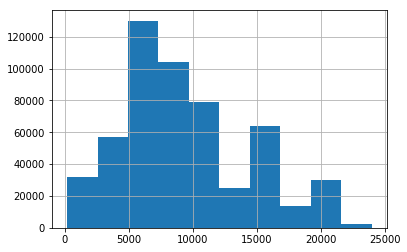

In [7]:
histogram = df[attribute].hist()